In [2]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer         
from sklearn.feature_extraction.text import TfidfVectorizer     
import gensim

[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


In [11]:
import time
import pickle
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

In [216]:
data = pd.read_csv("data/Reviews.csv")

In [217]:
data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [218]:
data.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [219]:
data.shape

(568454, 10)

In [220]:
data = data[data['Score'] != 3]

In [221]:
data.Score.unique()

array([5, 1, 4, 2])

In [222]:
data['Score'].value_counts()

5    363122
4     80655
1     52268
2     29769
Name: Score, dtype: int64

In [223]:
def partition(x):
    if x < 3:
        return 'negative'
    return 'positive'

score = data['Score']
temp = score.map(partition)
data['Score'] = temp

In [224]:
data = data.drop_duplicates(subset={"UserId","ProfileName","Time","Text"})

In [225]:
data = data[data['HelpfulnessNumerator'] <= data['HelpfulnessDenominator']]

In [226]:
data = data.iloc[:100000,:]

In [227]:
data_X = data['Text']
data_Y = data['Score']

In [228]:
data_Y.values[1]

'negative'

In [229]:
print(set(stopwords.words('english')))

{'being', 'through', 'now', 'where', 'be', 'very', "weren't", "don't", 'hadn', 'were', 'didn', 'for', 'yours', 'couldn', 'of', 'these', 'ourselves', 'at', 'mightn', 'myself', 'ours', 'him', 'by', "it's", 'haven', 'doesn', "wasn't", 'in', 'll', 'further', 'won', 'all', 'them', 'whom', 'had', 'and', 'my', 'when', 'those', 'into', 'nor', 'an', 'only', "should've", "shan't", 'am', 'own', 'between', 'their', 'i', 'same', 'so', 'm', 'y', 'does', 'itself', "shouldn't", "aren't", 'from', 'd', 'most', 'yourselves', 'has', 'did', 'such', 'weren', 'it', 'theirs', 'up', 'some', "mightn't", 'out', 'more', "isn't", "you're", 'who', 'wasn', 'after', 'we', 'against', 't', 'themselves', 'how', 'than', 're', 'her', 'can', 'any', "needn't", 'our', 'not', "mustn't", 'over', 'should', "that'll", 'just', 'isn', 'is', 'during', "doesn't", 'until', 'while', 'as', 'what', "she's", 'ma', 'about', "couldn't", 'under', "you'll", 'the', 'each', 'don', 'his', 'are', 've', 'shan', "you've", 'this', 's', 'was', "woul

In [4]:
import re
snow = nltk.stem.SnowballStemmer('english')
stop = set(stopwords.words('english'))

def cleanhtml(sentence):
    sentence = sentence.lower()                                       # Converting to lowercase
    cleanr = re.compile('<.*?>')
    sentence = re.sub(cleanr, ' ', sentence)                          # Cleaning Html tags
    
    return sentence

def cleanpunc(sentence):
    sentence = re.sub('[^A-Za-z0-9]+', '', sentence)                # Cleaning punctuations
    
    return sentence

In [231]:
temp = []
str1 = ''
positive_words = []
negative_words = []
i = 0
for sentence in data_X:
    words = []
    sentence = cleanhtml(sentence)
    for word in sentence.split():
        word = cleanpunc(word)
        if((word.isalpha()) & (len(word) > 2)): 
            if word not in stop:
                s = snow.stem(word).encode('utf8')
                words.append(s)
                if (data_Y.values)[i] == 'positive': 
                    positive_words.append(s) #list of all words used to describe positive reviews.
                if(data_Y.values)[i] == 'negative':
                    negative_words.append(s) #list of all words used to describe negative reviews.
            else:
                continue
        else:
                continue
    str1 = b" ".join(words)
    temp.append(str1)
    i += 1

In [261]:
temp[:10]

[b'bought sever vital can dog food product found good qualiti product look like stew process meat smell better labrador finicki appreci product better',
 b'product arriv label jumbo salt peanutsth peanut actual small size unsalt sure error vendor intend repres product jumbo',
 b'confect around centuri light pillowi citrus gelatin nut case filbert cut tini squar liber coat powder sugar tini mouth heaven chewi flavor high recommend yummi treat familiar stori lewi lion witch wardrob treat seduc edmund sell brother sister witch',
 b'look secret ingredi robitussin believ found got addit root beer extract order good made cherri soda flavor medicin',
 b'great taffi great price wide assort yummi taffi deliveri quick taffi lover deal',
 b'got wild hair taffi order five pound bag taffi enjoy mani flavor watermelon root beer melon peppermint grape etc complaint bit much redblack licoriceflavor piec particular favorit kid husband last two week would recommend brand taffi delight treat',
 b'saltwat

In [262]:
data_X = temp

In [263]:
df = pd.DataFrame(list(zip(data_X, data_Y)), columns = ['Text', 'Sentiment'] )

In [3]:
df.to_pickle('data/cleaned_file.pkl')

NameError: name 'df' is not defined

In [5]:
df = pd.read_pickle('data/cleaned_file.pkl')

In [ ]:
df.head()

In [ ]:
df['Text'][2]

In [6]:
X = df["Text"]
y = df["Sentiment"]

In [ ]:
df.shape, X.shape, y.shape

## Word2Vec 

In [ ]:
from gensim.models import Word2Vec
import math

In [ ]:
list_of_sentence = []
for sentence in X:
    words = []
    sentence = sentence.decode('utf-8')
    sentence = cleanhtml(sentence)
    for word in sentence.split():
        word = cleanpunc(word)
        if(word.isalpha()):    
            words.append(word)
        else:
            continue 
    list_of_sentence.append(words)

In [ ]:
w2v_model = gensim.models.Word2Vec(list_of_sentence, min_count = 5, size = 50, workers = 4)

In [ ]:
print(w2v_model.wv)

In [ ]:
w2v_vocab = list(w2v_model.wv.vocab)

In [ ]:
print(w2v_vocab[:10])

## Average Word2Vec 

In [ ]:
from tqdm import tqdm

corpus_embedding = []
for sentence in tqdm(X):
#     print(sentence)
#     break
    sentence = sentence.decode('utf-8')
    sentence_embedding = np.zeros(50)
    count_words = 0
    for word in sentence.split():
        if word in w2v_vocab:
            embedding = w2v_model.wv[word]
            sentence_embedding += embedding
            count_words += 1
    if count_words != 0:
        sentence_embedding /= count_words
    corpus_embedding.append(sentence_embedding)

In [ ]:
X = corpus_embedding

In [ ]:
from sklearn.preprocessing import StandardScaler
standardized_data = StandardScaler(with_mean=False)
standardized_X=standardized_data.fit_transform(X)

In [27]:
k=[2,3,4,5,6,7,8,9,10]
scores = []    
for i in k:
    
    kmeans = KMeans(n_clusters=i)

    # fitting the model 
    kmeans.fit(standardized_X)
    
    score = kmeans.inertia_

    scores.append(score)

In [28]:
optimal_k = k[scores.index(max(scores))]
print('\nThe optimal value is %d.' % optimal_k)


The optimal value is 2.


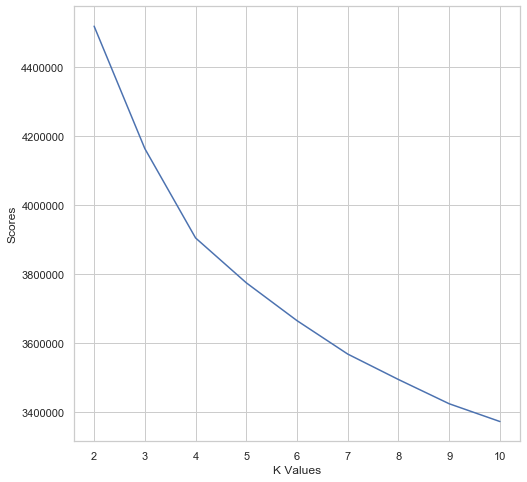

In [31]:
import seaborn as sns
sns.set_style("whitegrid")

plt.figure(figsize=(8,8))
plt.plot(k,scores)
plt.rcParams.update({'font.size': 15})

plt.xlabel('K Values')
plt.ylabel('Scores')
plt.show()

## Average Word2Vec with tf_idf 

In [32]:
X = df["Text"]

In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer
model = TfidfVectorizer()

tf_idf_matrix = model.fit_transform(X.values)
dictionary = dict(zip(model.get_feature_names(), list(model.idf_)))

In [34]:
tfidf_embedding = []
for sentence in tqdm(X):
    sentence = sentence.decode('utf-8')
    sentence_embedding = np.zeros(50)
    weight_sum = 0
    for word in sentence.split():
        if word in w2v_vocab:
            embedding = w2v_model.wv[word]
            tf_idf = dictionary[word] * sentence.count(word)
            sentence_embedding += (embedding * tf_idf)
            weight_sum += tf_idf
    if weight_sum != 0:
        sentence_embedding /= weight_sum
    tfidf_embedding.append(sentence_embedding)

100%|█████████████████████████████████████████████████████████████████████████| 100000/100000 [10:03<00:00, 165.77it/s]


In [35]:
X = tfidf_embedding

In [36]:
from sklearn.preprocessing import StandardScaler
standardized_data = StandardScaler(with_mean=False)
standardized_X=standardized_data.fit_transform(X)

In [37]:
k=[2,3,4,5,6,7,8,9,10]
scores = []    
for i in k:
    
    kmeans = KMeans(n_clusters = i)

    # fitting the model 
    kmeans.fit(standardized_X)
    
    score = kmeans.inertia_

    scores.append(score)

In [38]:
optimal_k = k[scores.index(max(scores))]
print('\nThe optimal value is %d.' % optimal_k)


The optimal value is 2.


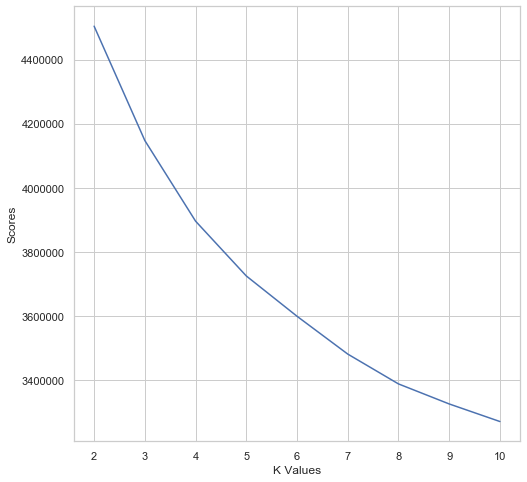

In [39]:
import seaborn as sns
sns.set_style("whitegrid")

plt.figure(figsize=(8,8))
plt.plot(k,scores)
plt.rcParams.update({'font.size': 15})

plt.xlabel('K Values')
plt.ylabel('Scores')
plt.show()

## bag of words

In [7]:
X = df["Text"]

In [8]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

count_vect = CountVectorizer() #in scikit-learn
X_b = count_vect.fit_transform(X)

In [9]:
from sklearn.preprocessing import StandardScaler
standardized_data = StandardScaler(with_mean=False)
standardized_X=standardized_data.fit_transform(X_b)

In [12]:
k=[2,3,4,5,6,7,8,9,10]
scores = []    
for i in k:
    
    kmeans = KMeans(n_clusters=i)

    # fitting the model 
    kmeans.fit(standardized_X)
    
    score=kmeans.inertia_

    scores.append(score)

In [13]:
optimal_k = k[scores.index(max(scores))]
print('\nThe optimal value is %d.' % optimal_k)


The optimal value is 2.


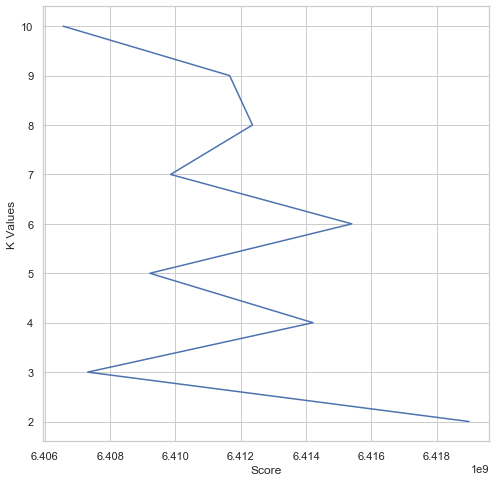

In [14]:
import seaborn as sns
sns.set_style("whitegrid")

plt.figure(figsize=(8,8))
plt.plot(scores,k)
plt.rcParams.update({'font.size': 15})

plt.xlabel('Score')
plt.ylabel('K Values')
plt.show()

In [21]:
model = KMeans(n_clusters = 2)

In [22]:
model.fit(standardized_X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [23]:
order_centroids = model.cluster_centers_.argsort()[:, ::-1]

In [24]:
all_features = count_vect.get_feature_names()

In [25]:
from collections import Counter
from wordcloud import WordCloud

Cluster 0:


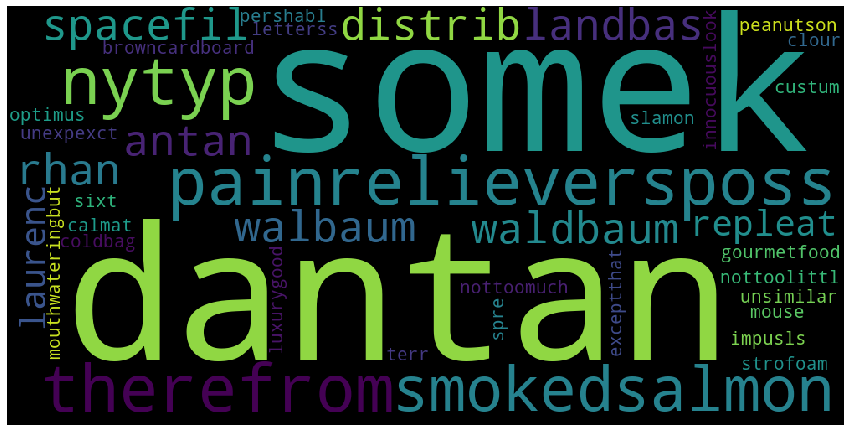

Cluster 1:


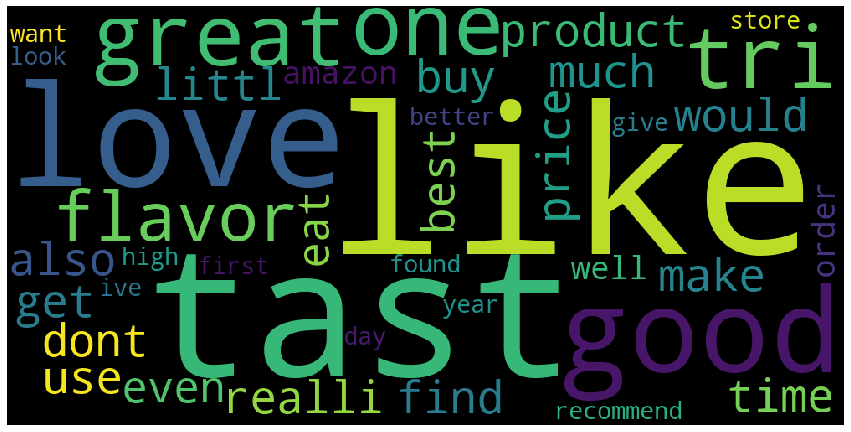

In [26]:
for i in range(optimal_k):
    top_feature_per_cluster=[]
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :40]:
        top_feature_per_cluster.append(all_features[ind])
    word_could_dict = Counter(top_feature_per_cluster)
    wordcloud = WordCloud(width = 1000, height = 500).generate_from_frequencies(word_could_dict)

    plt.figure(figsize=(15,8))
    plt.imshow(wordcloud)
    plt.axis("off") 
    plt.show()

## tf_idf

In [27]:
X = df["Text"]

In [28]:
tf_idf_vect = TfidfVectorizer()
X = tf_idf_vect.fit_transform(X)

In [29]:
from sklearn.preprocessing import StandardScaler
standardized_data = StandardScaler(with_mean=False)
standardized_X=standardized_data.fit_transform(X)

In [30]:
k=[2,3,4,5,6,7,8,9,10]
scores = []    
for i in k:
    
    kmeans = KMeans(n_clusters=i)

    # fitting the model 
    kmeans.fit(standardized_X)
    
    score=kmeans.inertia_

    scores.append(score)

In [31]:
optimal_k = k[scores.index(max(scores))]
print('\nThe optimal value is %d.' % optimal_k)


The optimal value is 2.


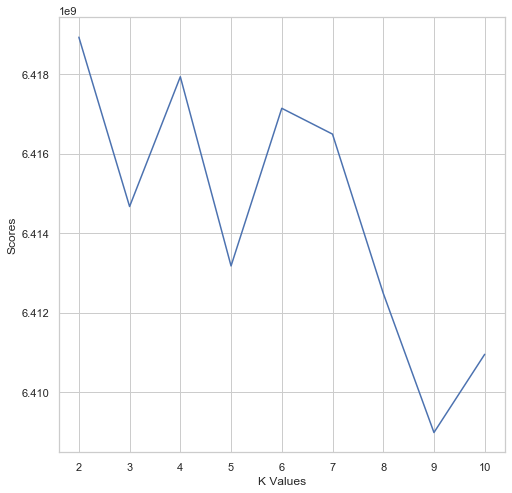

In [32]:
import seaborn as sns
sns.set_style("whitegrid")

plt.figure(figsize=(8,8))
plt.plot(k,scores)
plt.rcParams.update({'font.size': 15})

plt.xlabel('K Values')
plt.ylabel('Scores')
plt.show()

In [33]:
model=KMeans(n_clusters = 2)

In [34]:
model.fit(standardized_X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [47]:
print(model.cluster_centers_.argsort()[:,])

[[    0 42779 42780 ... 46320 21346 29021]
 [21346 29021 46320 ... 32311 55249 31568]]


In [35]:
order_centroids = model.cluster_centers_.argsort()[:, ::-1]

In [36]:
all_features = tf_idf_vect.get_feature_names()

Cluster 0:


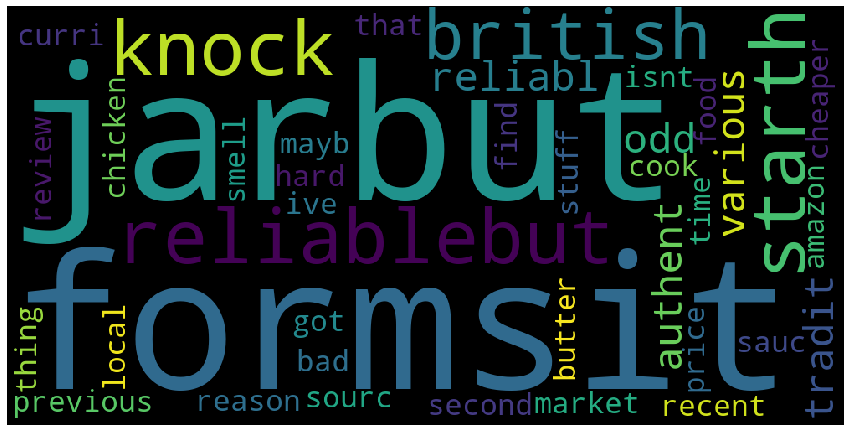

Cluster 1:


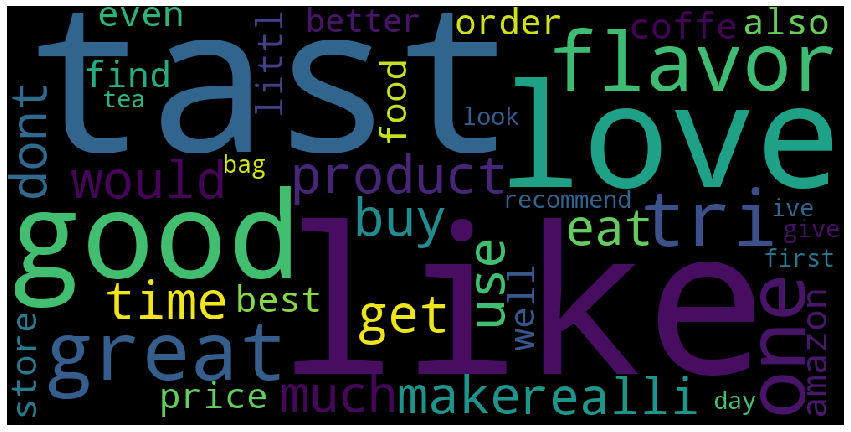

In [37]:
for i in range(optimal_k):
    top_feature_per_cluster=[]
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :40]:
        top_feature_per_cluster.append(all_features[ind])
    word_could_dict=Counter(top_feature_per_cluster)
    wordcloud = WordCloud(width = 1000, height = 500).generate_from_frequencies(word_could_dict)

    plt.figure(figsize=(15,8))
    plt.imshow(wordcloud)
    plt.axis("off") 
    plt.show()